## Redes Neuronales con una Capa Oculta


<h2>Objetivo</h2><ul><li>Cómo clasificar dígitos escritos a mano usando una Red Neuronal.</li></ul>


In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

Usa las siguientes funciones auxiliares para graficar la pérdida:


In [2]:
# Define a function to plot accuracy and loss

def plot_accuracy_loss(training_results):
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.show()

Usa la siguiente función para imprimir los parámetros del modelo:


In [3]:
# Define a function to plot model parameters

def print_model_parameters(model):
    count = 0
    for ele in model.state_dict():
        count += 1
        if count % 2 != 0:
            print ("The following are the parameters for the layer ", count // 2 + 1)
        if ele.find("bias") != -1:
            print("The size of bias: ", model.state_dict()[ele].size())
        else:
            print("The size of weights: ", model.state_dict()[ele].size())

Define el módulo o la clase de la red neuronal:


In [4]:
# Define a function to display data

def show_data(data_sample):
    plt.imshow(data_sample.numpy().reshape(28, 28), cmap='gray')
    plt.show()

#### Módulo de Red Neuronal y Función de Entrenamiento


Define el módulo o la clase de la red neuronal:


In [5]:
# Define a Neural Network class

class Net(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = self.linear2(x)
        return x

Define una función para entrenar el modelo. En este caso, la función devuelve un diccionario de Python para almacenar la pérdida de entrenamiento y la exactitud en los datos de validación.


In [6]:
# Define a training function to train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [],'validation_accuracy': []}
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
             #loss for every iteration
            useful_stuff['training_loss'].append(loss.data.item())
        correct = 0
        for x, y in validation_loader:
            #validation
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    return useful_stuff

#### Genera unos datos

Carga el conjunto de datos de entrenamiento estableciendo el parámetro train en True y conviértelo en un tensor colocando un objeto de transformación en el argumento transform


In [7]:
# Create training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Carga el conjunto de datos de prueba y conviértelo en un tensor colocando un objeto de transformación en el argumento transform


In [8]:
# Create validating dataset

validation_dataset = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())

Crea la función de criterio:


In [9]:
# Create criterion function

criterion = nn.CrossEntropyLoss()

Crea los objetos *data loader* de los datos de entrenamiento y de validación:


In [10]:
# Create data loader for both train dataset and valdiate dataset

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

#### Define la Red Neuronal, el Optimizador y entrena el modelo


Crea el modelo con 100 neuronas

In [11]:
# Create the model with 100 neurons

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

Imprime los parámetros del modelo

In [12]:
# Print the parameters for model

print_model_parameters(model)

The following are the parameters for the layer  1
The size of weights:  torch.Size([100, 784])
The size of bias:  torch.Size([100])
The following are the parameters for the layer  2
The size of weights:  torch.Size([10, 100])
The size of bias:  torch.Size([10])


Define el objeto optimizador con una tasa de aprendizaje de 0.01:


In [13]:
# Set the learning rate and the optimizer

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Entrena el modelo con 100 epocas

In [14]:
# Train the model

training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

#### Analiza los resultados

Grafica la pérdida total o el costo de entrenamiento para cada iteración y grafica la exactitud de entrenamiento para cada época:


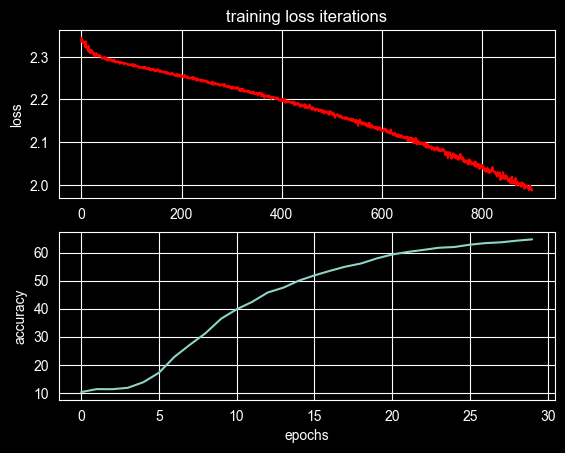

In [15]:
# Plot the accuracy and loss

plot_accuracy_loss(training_results)

Grafica las primeras cinco muestras mal clasificadas:


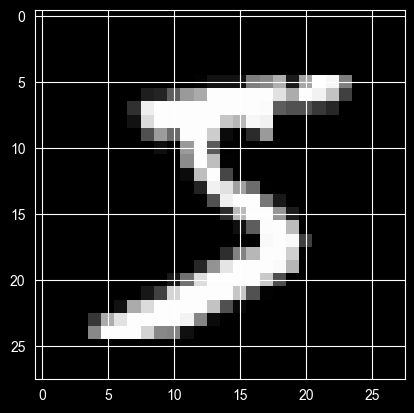

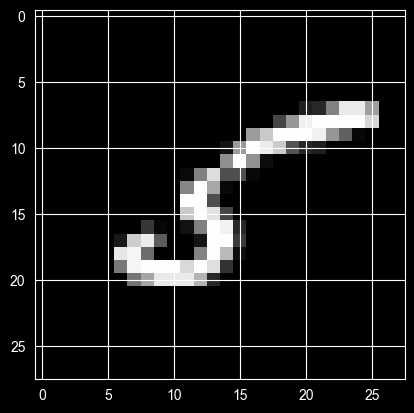

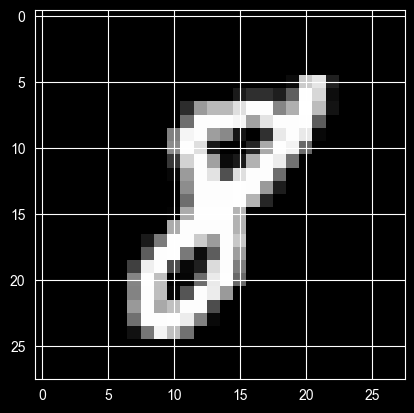

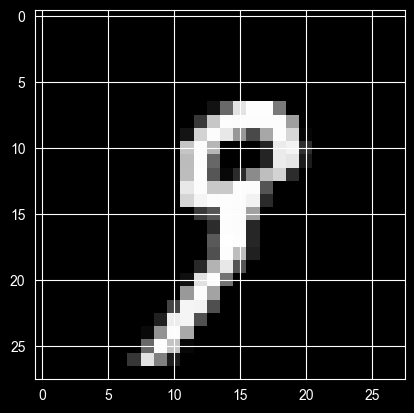

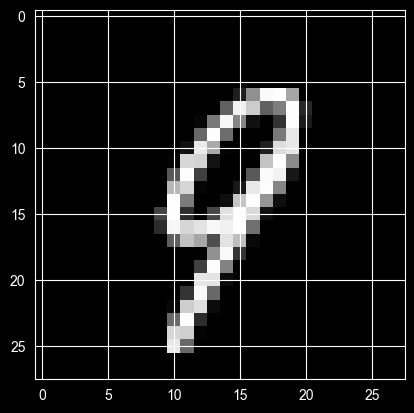

In [16]:
# Plot the first five misclassified samples

count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _,yhat = torch.max(z, 1)
    if yhat != y:
        show_data(x)
        count += 1
    if count >= 5:
        break

#### Practica

Usa nn.Sequential para construir exactamente el mismo modelo que acabas de crear. Utiliza la función train para entrenar el modelo y la función plot_accuracy_loss para visualizar las métricas. Además, prueba con diferentes números de épocas.


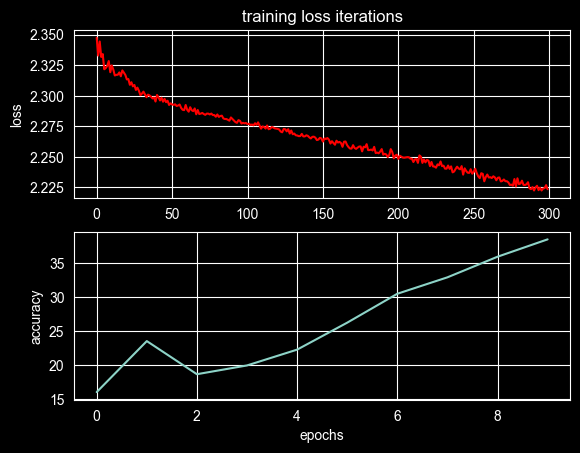

In [17]:
input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, hidden_dim),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_dim, output_dim),
)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs = 10)
plot_accuracy_loss(training_results)